# Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import kstest, anderson, kruskal
from matplotlib.ticker import FuncFormatter
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from scikit_posthocs import posthoc_dunn

# Load data

In [4]:
categorical_columns = ['maker', 'color', 'body_type', 'gearbox', 'fuel_type']
categorical_dtypes = {col: 'category' for col in categorical_columns}

cars = pd.read_csv('../data/processed_capstone_data.csv', index_col='adv_id', dtype=categorical_dtypes)
cars

,maker,genmodel,genmodel_id,adv_year,adv_month,color,reg_year,body_type,run_miles,engine_size,...,engine_power,annual_tax,wheelbase,height,width,length,average_mpg,top_speed,seat_num,door_num
adv_id,,,,,,,,,,,,,,,,,,,,,
10_1$$1,Bentley,Arnage,10_1,2018,4,Silver,2000,Saloon,60000.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$10,Bentley,Arnage,10_1,2017,11,Silver,2003,Saloon,38000.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$11,Bentley,Arnage,10_1,2018,3,Green,2003,Saloon,69491.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
10_1$$12,Bentley,Arnage,10_1,2018,6,Silver,2002,Saloon,52000.0,6.8,...,450.0,315.0,3116.0,1515.0,2125.0,5390.0,13.7,179.0,5.0,4.0
10_1$$13,Bentley,Arnage,10_1,2018,4,Silver,2000,Saloon,53444.0,6.8,...,450.0,NaN,3116.0,1515.0,2125.0,5390.0,NaN,NaN,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97_1$$1,Westfield,Sport,97_1,2018,5,Yellow,2006,Convertible,1800.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
97_1$$2,Westfield,Sport,97_1,2018,5,Yellow,2006,Convertible,2009.0,2.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
99_1$$1,Zenos,E10,99_1,2018,3,Red,2016,Convertible,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN


# General information

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266235 entries, 10_1$$1 to 99_1$$3
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   maker         266235 non-null  category
 1   genmodel      266235 non-null  object  
 2   genmodel_id   266235 non-null  object  
 3   adv_year      266235 non-null  int64   
 4   adv_month     266235 non-null  int64   
 5   color         244498 non-null  category
 6   reg_year      266235 non-null  int64   
 7   body_type     266216 non-null  category
 8   run_miles     265201 non-null  float64 
 9   engine_size   265913 non-null  float64 
 10  gearbox       266085 non-null  category
 11  fuel_type     266233 non-null  category
 12  price         266235 non-null  float64 
 13  engine_power  264280 non-null  float64 
 14  annual_tax    219940 non-null  float64 
 15  wheelbase     257408 non-null  float64 
 16  height        265081 non-null  float64 
 17  width         265403 non-nu

In [6]:
cars.nunique()

maker              88
genmodel          890
genmodel_id       875
adv_year            9
adv_month          12
color              22
reg_year           26
body_type          17
run_miles       72305
engine_size        71
gearbox             3
fuel_type           8
price           20454
engine_power      466
annual_tax         24
wheelbase         426
height            572
width             475
length            983
average_mpg       358
top_speed         137
seat_num            9
door_num            6
dtype: int64

# Distributions

## Numerical

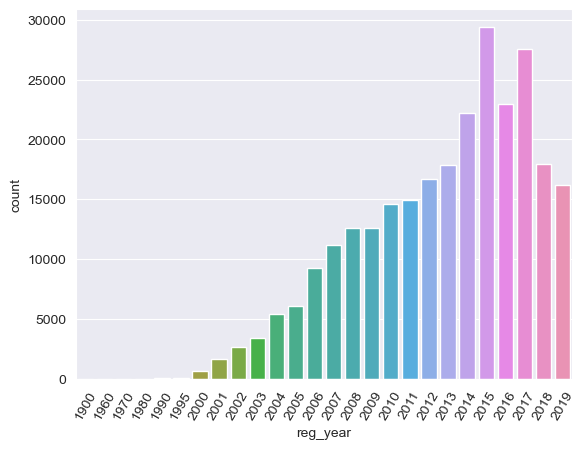

In [7]:
sns.countplot(data=cars, x='reg_year', orient='v')
plt.xticks(rotation=60)
plt.show()

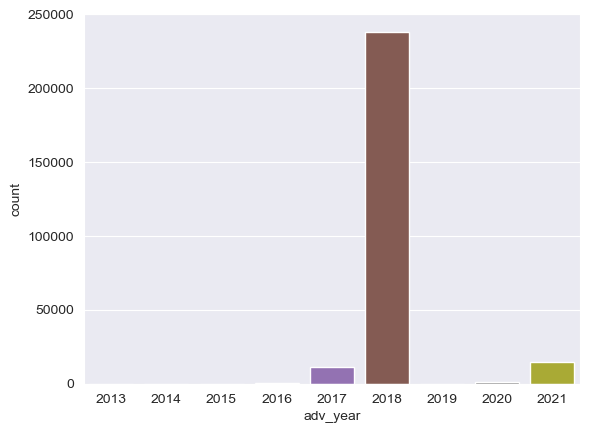

In [8]:
sns.countplot(data=cars, x='adv_year', orient='v')
plt.show()

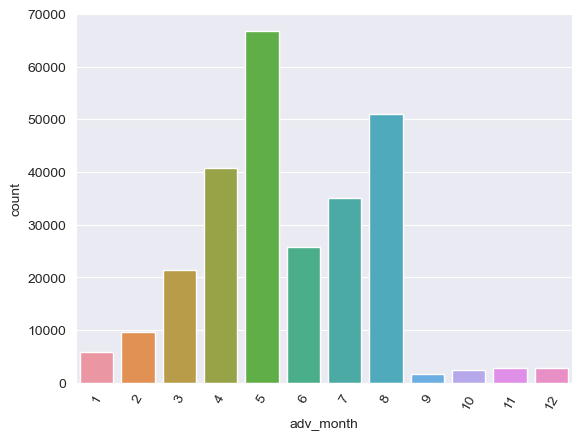

In [9]:
sns.countplot(data=cars, x='adv_month', orient='v')
plt.xticks(rotation=60)
plt.show()

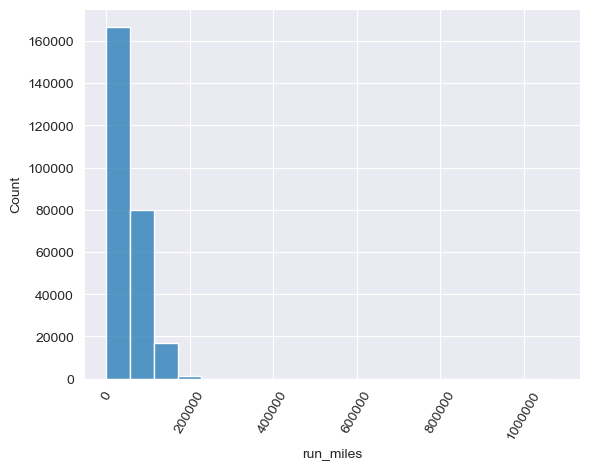

In [10]:
# Sturge's rule k = 1 + 3.322 log(n)

n = round(1 + 3.322 * math.log(cars.shape[0], 10))

sns.histplot(data=cars, x='run_miles', bins=n)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xticks(rotation=60)
plt.show()

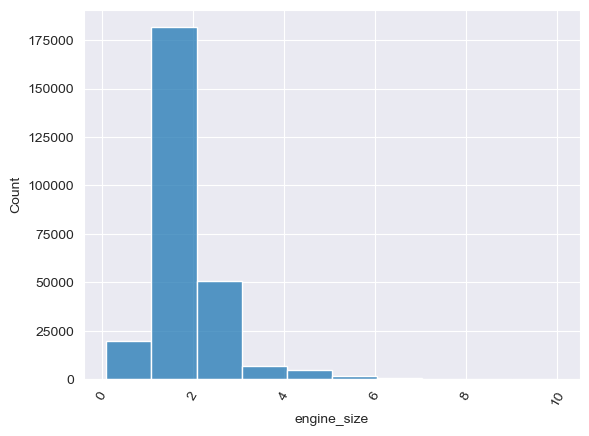

In [11]:
sns.histplot(data=cars, x='engine_size', bins=10)
plt.xticks(rotation=60)
plt.show()

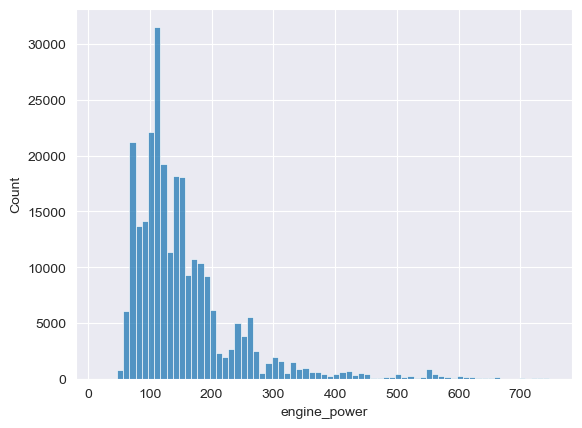

In [12]:
sns.histplot(data=cars, x='engine_power', binwidth=10)
plt.show()

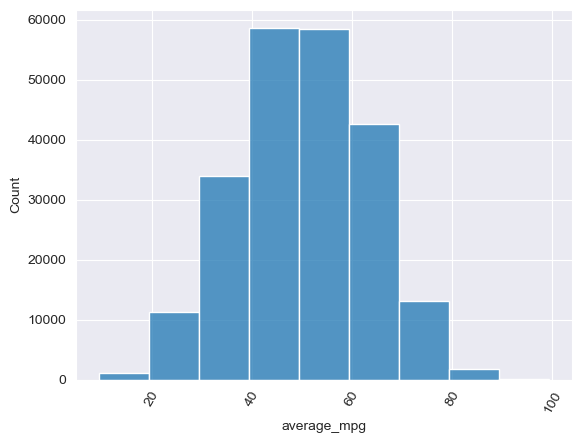

In [13]:
sns.histplot(data=cars[~cars['fuel_type'].str.contains('Hybrid|Electric', na=False)], x='average_mpg', binwidth=10)
plt.xticks(rotation=60)
plt.show()

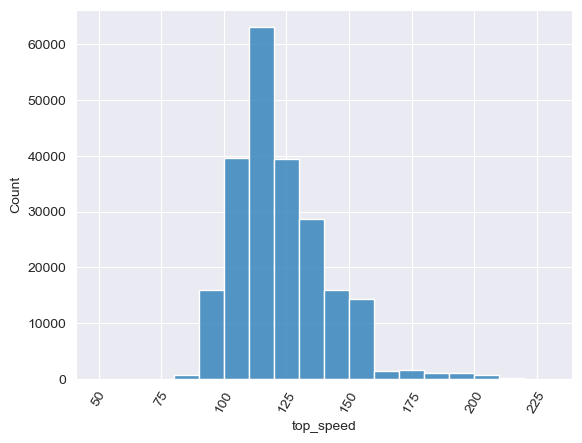

In [14]:
sns.histplot(data=cars, x='top_speed', binwidth=10)
plt.xticks(rotation=60)
plt.show()

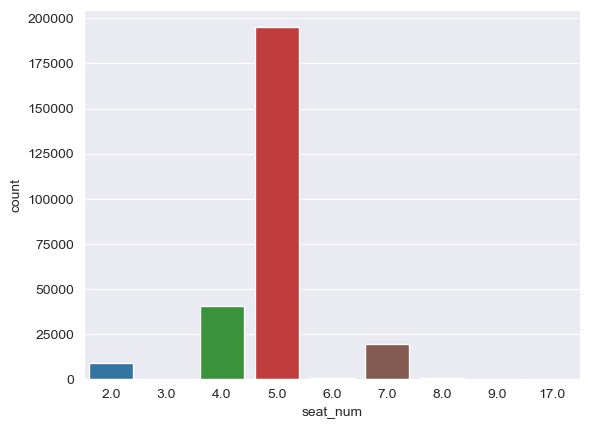

In [15]:
sns.countplot(data=cars, x='seat_num', orient='v')
plt.show()

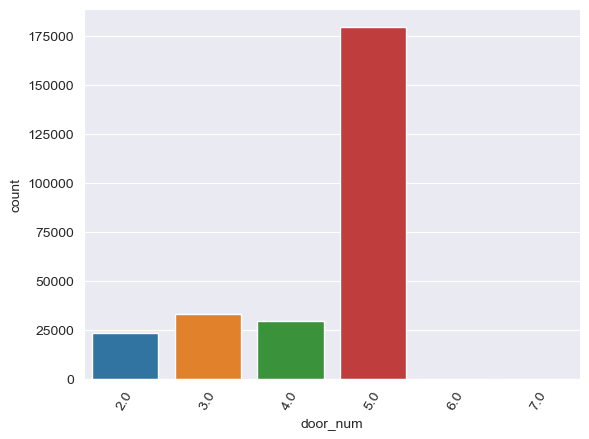

In [16]:
sns.countplot(data=cars, x='door_num', orient='v')
plt.xticks(rotation=60)
plt.show()

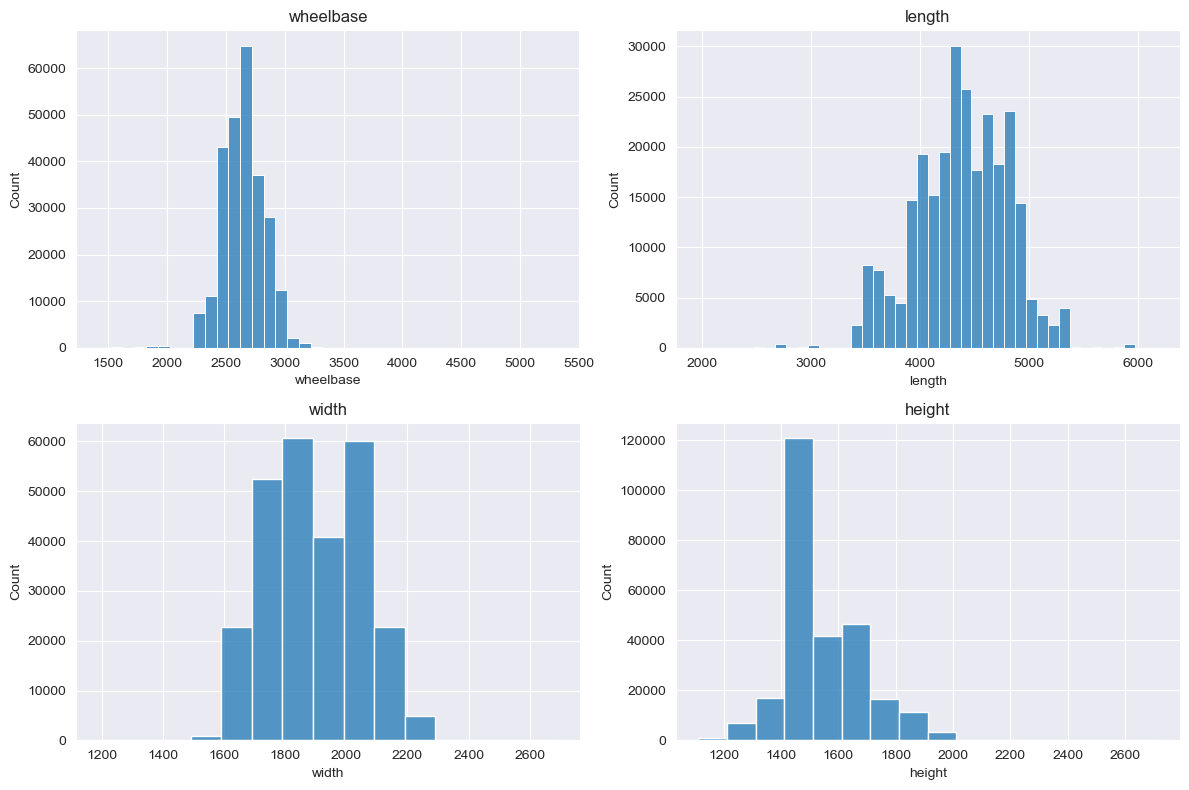

In [17]:
dimension_columns = ['wheelbase', 'length', 'width', 'height']

fig, axes = plt.subplots(nrows=round(len(dimension_columns) / 2), ncols=2, figsize=(12, 8))
print()
for i, col_name in enumerate(dimension_columns):
    row = i // 2
    col = i % 2
    sns.histplot(data=cars, x=col_name, ax=axes[row, col], binwidth=100)
    axes[row, col].set_title(col_name)
    
    
plt.tight_layout()
plt.show()

## Categorical

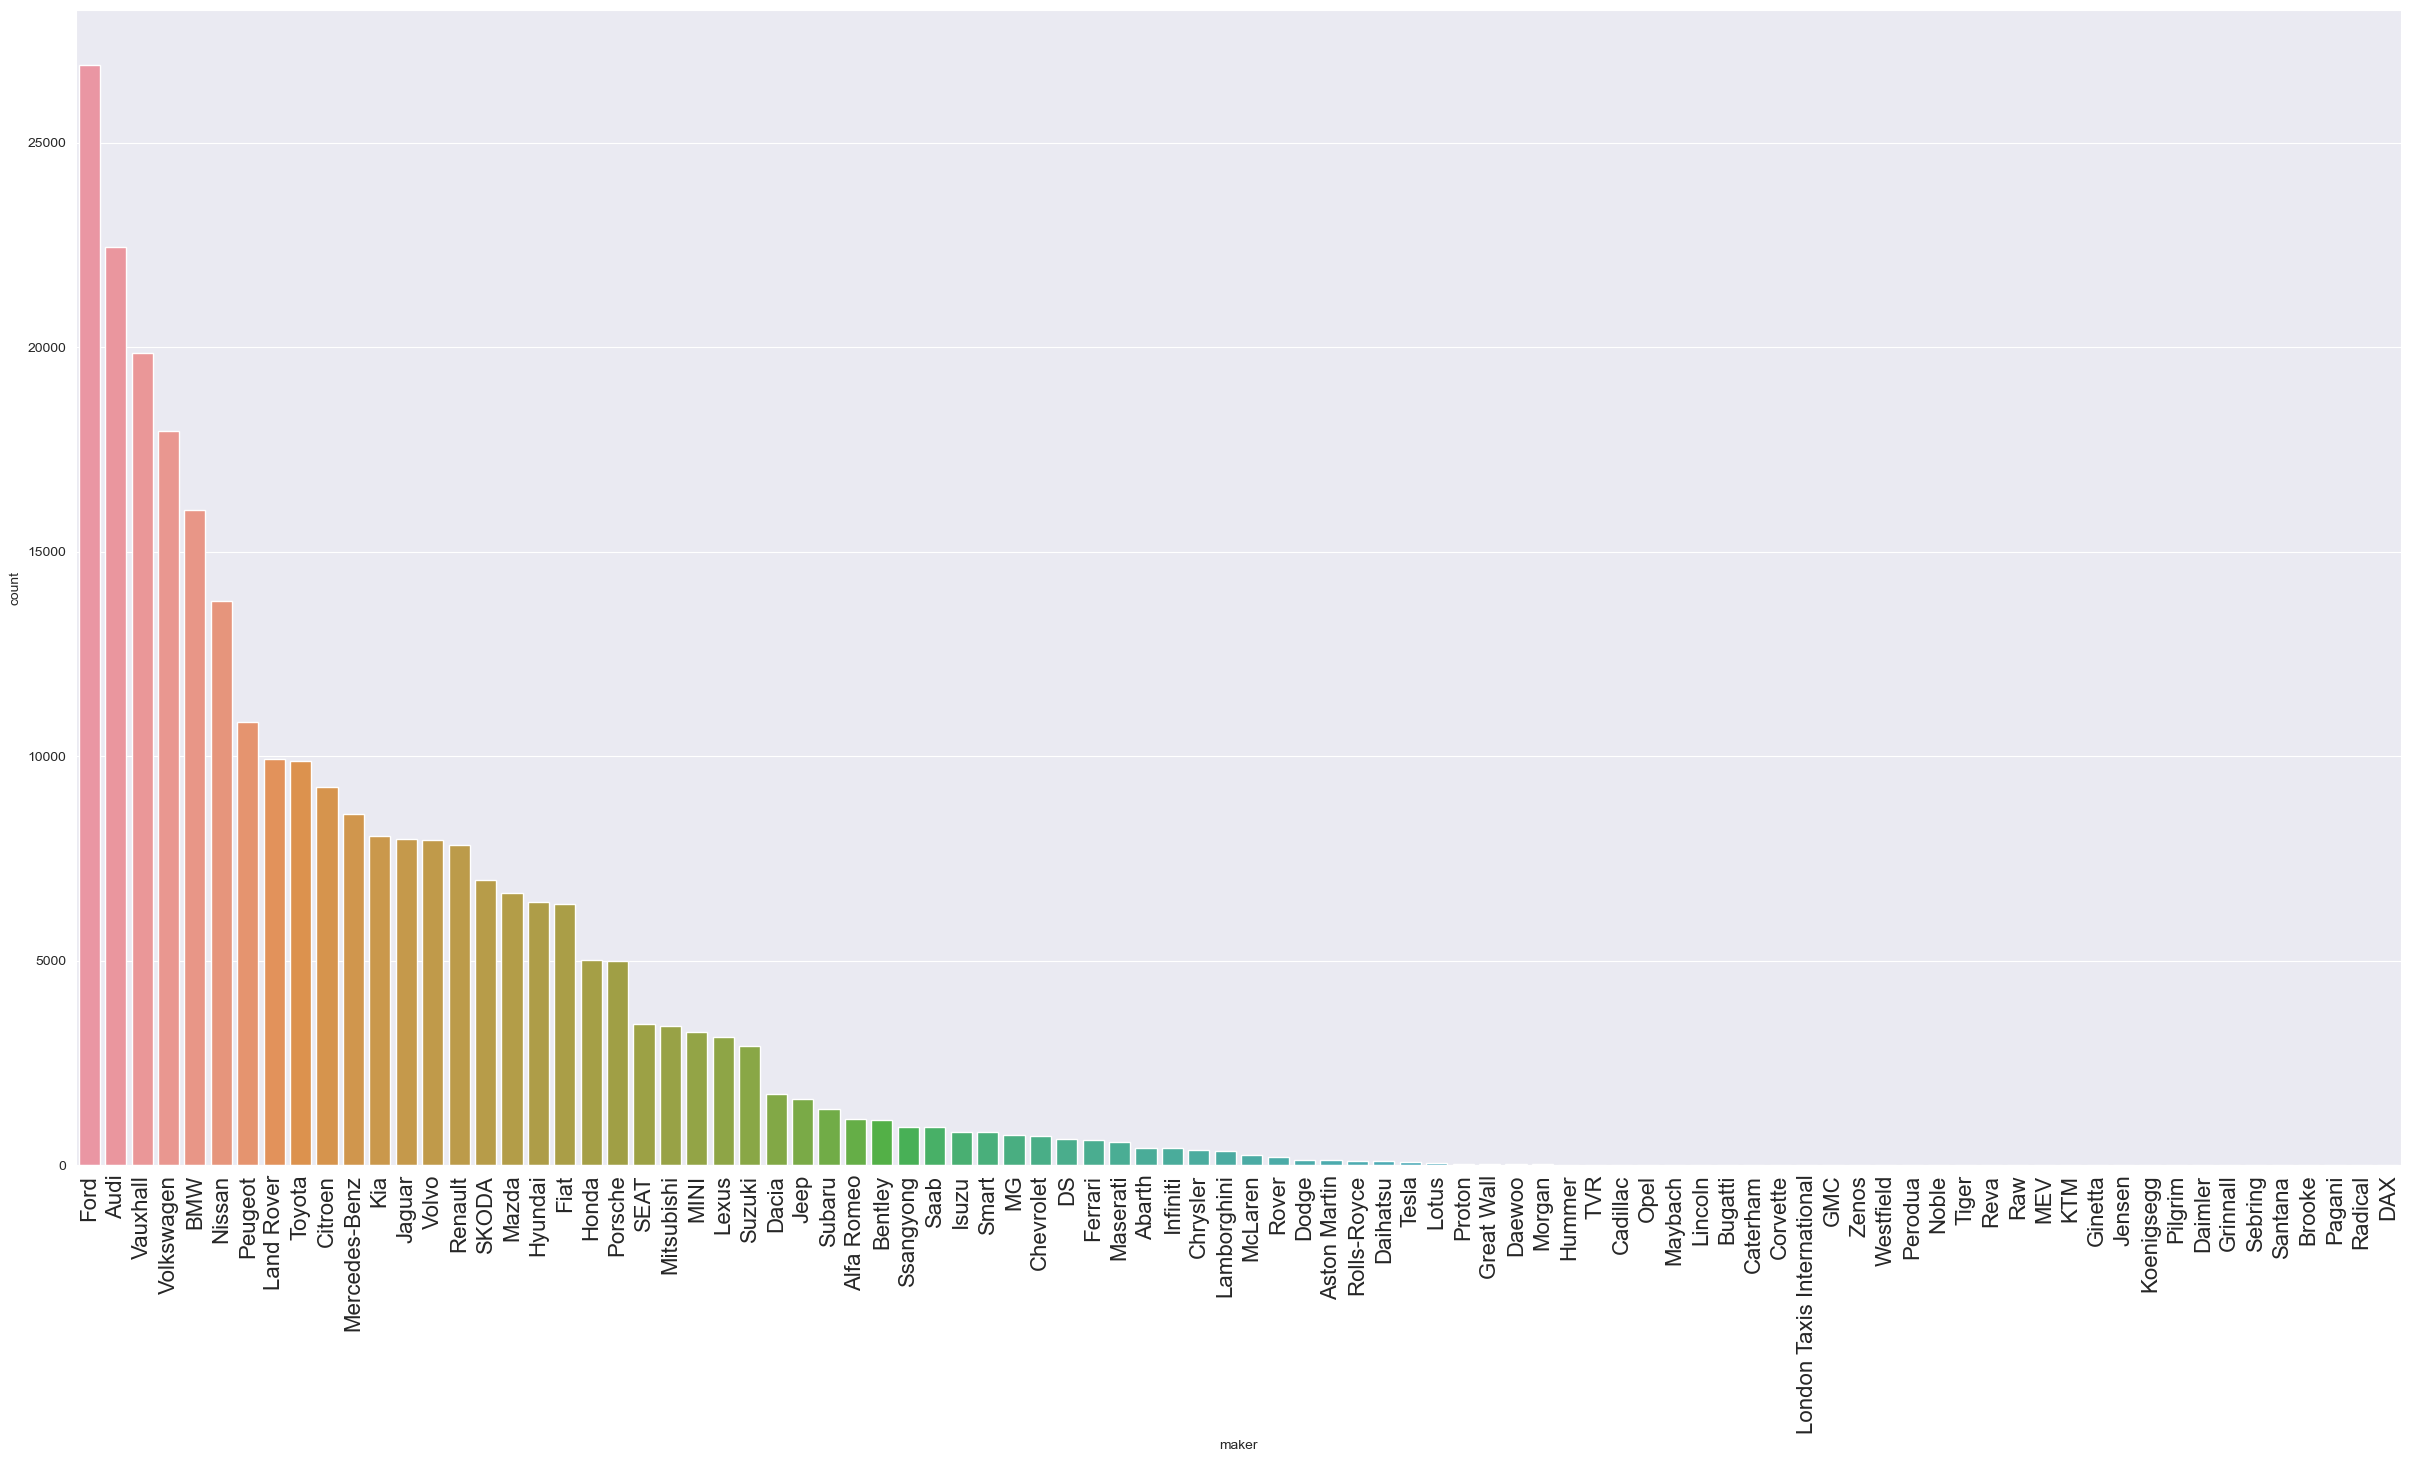

In [18]:
order_list = cars['maker'].value_counts().index

plt.figure(figsize=(30, 15))
sns.countplot(data=cars, x='maker', order=order_list, orient='v')
plt.xticks(rotation=90, fontsize=16)
plt.show()

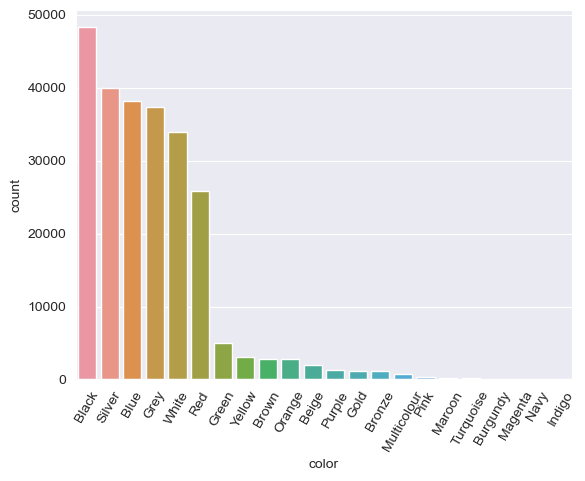

In [19]:
sns.countplot(data=cars, x='color', order=cars['color'].value_counts().index ,orient='v')
plt.xticks(rotation=60)
plt.show()

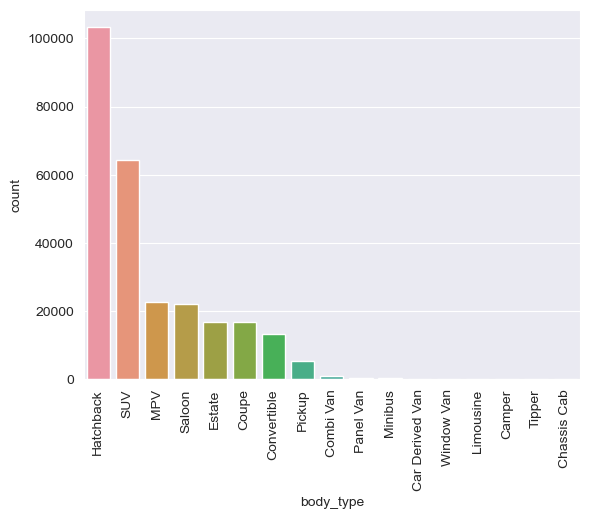

In [20]:
sns.countplot(data=cars, x='body_type', order=cars['body_type'].value_counts().index ,orient='v')
plt.xticks(rotation=90)
plt.show()

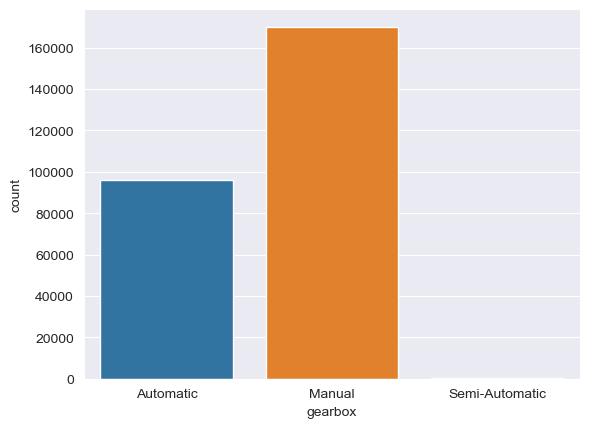

In [21]:
sns.countplot(data=cars, x='gearbox', orient='v')
plt.show()

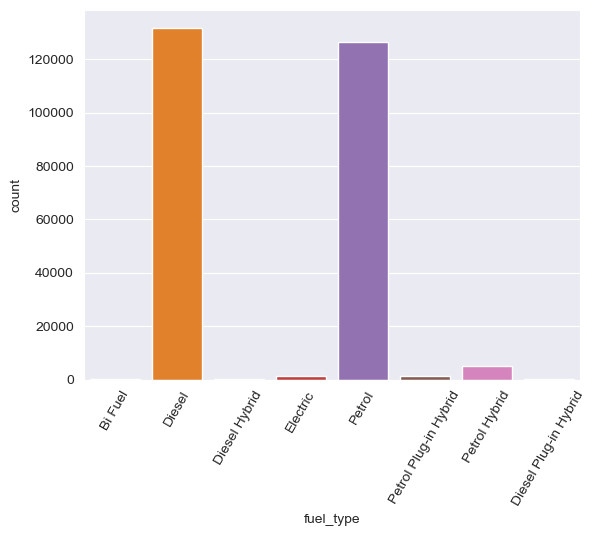

In [22]:
sns.countplot(data=cars, x='fuel_type', orient='v')
plt.xticks(rotation=60)
plt.show()

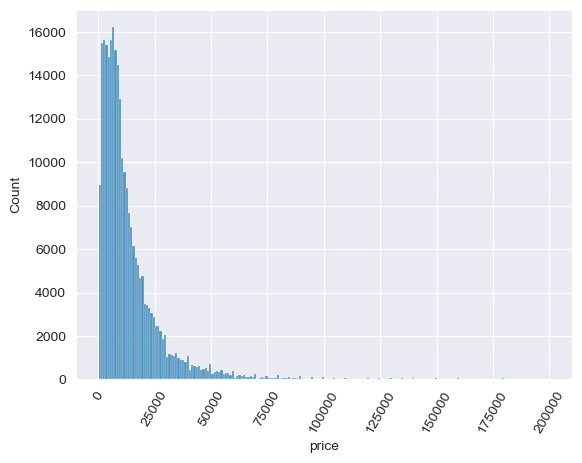

In [23]:
sns.histplot(data=cars[cars['price'] < 200000], x='price', binwidth=1000)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xticks(rotation=60)
plt.show()

H0: Price is normally distributed.
H1: Price is not normally distributed.

In [24]:
# Kolmogorov-Smirnov 
kstest(cars['price'].dropna(), 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=100.0, statistic_sign=-1)

We reject null hypothesis because pvalue < 0.05. 

In [25]:
anderson(cars['price'].dropna())

AndersonResult(statistic=36040.66977325891, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=14716.721152365391, scale=25945.07313817017)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Results at significance level  of 0.05 are significant. So we reject null hypothesis.

# Numerical relationships

[source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/)

Pearson: `price` is not normally distributed
Spearman: `price` and `reg_year` not monotonically related

That's why I chose Kendall Correlation.  

In [26]:
cars.corr(method='kendall', numeric_only=True)['price'].sort_values(ascending=False)

price           1.000000
reg_year        0.566539
engine_power    0.416704
length          0.333347
top_speed       0.325650
engine_size     0.309024
width           0.306246
wheelbase       0.304577
height          0.115445
adv_year        0.108066
seat_num        0.032212
average_mpg     0.023576
door_num        0.019635
annual_tax     -0.003239
adv_month      -0.057320
run_miles      -0.472960
Name: price, dtype: float64

# Categorical relationships

### ANOVA

In [27]:
categorical_columns = ['maker', 'genmodel', 'color', 'body_type', 'gearbox', 'fuel_type']

for column in categorical_columns:
    model = ols(formula=f'price  ~ {column}', data=cars).fit()

    anova_result = sm.stats.anova_lm(model, type=2)
    print(anova_result)

                df        sum_sq       mean_sq            F  PR(>F)
maker         87.0  8.013620e+13  9.211058e+11  2474.299306     0.0
Residual  266147.0  9.907837e+13  3.722693e+08          NaN     NaN
                df        sum_sq       mean_sq            F  PR(>F)
genmodel     889.0  1.496804e+14  1.683694e+11  1512.687401     0.0
Residual  265345.0  2.953418e+13  1.113048e+08          NaN     NaN
                df        sum_sq       mean_sq          F  PR(>F)
color         21.0  1.386221e+12  6.601052e+10  99.400097     0.0
Residual  244476.0  1.623539e+14  6.640891e+08        NaN     NaN
                 df        sum_sq       mean_sq            F  PR(>F)
body_type      16.0  1.743328e+13  1.089580e+12  1823.020906     0.0
Residual   266199.0  1.591013e+14  5.976782e+08          NaN     NaN
                df        sum_sq       mean_sq            F  PR(>F)
gearbox        2.0  1.806156e+13  9.030781e+12  17900.11293     0.0
Residual  266082.0  1.342410e+14  5.045097e+08     

### Tukey's test

In [28]:
not_na_cars = cars[cars['fuel_type'].notna()]

tukey_results = pairwise_tukeyhsd(not_na_cars['price'], not_na_cars['fuel_type'])

print(tukey_results.summary())

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                     
        group1                group2          meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------------------------------------
              Bi Fuel                Diesel   6380.7468  0.902  -8583.9266 21345.4203  False
              Bi Fuel         Diesel Hybrid  18349.2311  0.014   2135.1392 34563.3229   True
              Bi Fuel Diesel Plug-in Hybrid  16214.9972 0.1848  -3250.3632 35680.3575  False
              Bi Fuel              Electric   8884.8573 0.6329  -6232.4004  24002.115  False
              Bi Fuel                Petrol   5849.9829 0.9365  -9114.7547 20814.7206  False
              Bi Fuel         Petrol Hybrid  12751.8902 0.1646  -2251.2459 27755.0264  False
              Bi Fuel Petrol Plug-in Hybrid   35487.736    0.0  20365.5016 50609.9703   True
               Diesel         Diesel Hybrid  11968.4842    0.0   5719.

In [29]:
not_na_cars = cars[cars['gearbox'].notna()]

tukey_results = pairwise_tukeyhsd(not_na_cars['price'], not_na_cars['gearbox'])

print(tukey_results.summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1      group2       meandiff  p-adj    lower       upper    reject
-------------------------------------------------------------------------
Automatic         Manual  -16547.533   0.0 -16760.1403 -16334.9256   True
Automatic Semi-Automatic  86234.0307   0.0  81716.7684  90751.2929   True
   Manual Semi-Automatic 102781.5636   0.0   98265.698 107297.4293   True
-------------------------------------------------------------------------


In [30]:
not_na_cars = cars[cars['body_type'].notna()]

tukey_results = pairwise_tukeyhsd(not_na_cars['price'], not_na_cars['body_type'])

print(tukey_results.summary())

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
     group1          group2       meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------------------------
         Camper Car Derived Van -38384.6346    0.0  -54841.7369 -21927.5323   True
         Camper     Chassis Cab -34752.6176 0.9939 -120536.6784  51031.4431  False
         Camper       Combi Van -29735.2681    0.0  -44525.6234 -14944.9128   True
         Camper     Convertible -26811.3768    0.0  -41330.3085  -12292.445   True
         Camper           Coupe -12655.7278 0.1773  -27170.6815    1859.226  False
         Camper          Estate -36543.4946    0.0  -51058.3154 -22028.6739   True
         Camper       Hatchback -42145.7124    0.0  -56648.2518 -27643.1731   True
         Camper       Limousine   8976.4254 0.9215   -7968.2387  25921.0895  False
         Camper             MPV -40566.4226    0.0  -55077.4905 -26055.3546   True
    

### Kruskal-Wallis test

In [31]:
categorical_columns = ['maker', 'genmodel', 'color', 'body_type', 'gearbox', 'fuel_type']

for column in categorical_columns:
    grouped_data = cars.groupby(column)['price'].apply(list)

    kruskal_results = kruskal(*grouped_data)
    print(f'{column}: {kruskal_results}')

maker: KruskalResult(statistic=73275.87077641764, pvalue=0.0)
genmodel: KruskalResult(statistic=165688.46954589905, pvalue=0.0)
color: KruskalResult(statistic=10361.527509947071, pvalue=0.0)
body_type: KruskalResult(statistic=62417.167725295396, pvalue=0.0)
gearbox: KruskalResult(statistic=61354.43226571896, pvalue=0.0)
fuel_type: KruskalResult(statistic=17437.746359662422, pvalue=0.0)


### Dunn's test

In [32]:
not_na_cars = cars[cars['maker'].notna()]

dunn_results = posthoc_dunn(not_na_cars, val_col='price', group_col='maker')

print(dunn_results)

             Bentley    Brooke   Bugatti  Cadillac  Caterham      Chevrolet  \
Bentley     1.000000  0.903068  0.786209  0.000022  0.092117   0.000000e+00   
Brooke      0.903068  1.000000  0.809306  0.164719  0.460642   1.059291e-02   
Bugatti     0.786209  0.809306  1.000000  0.010582  0.166153   9.472940e-07   
Cadillac    0.000022  0.164719  0.010582  1.000000  0.358697   4.753453e-03   
Caterham    0.092117  0.460642  0.166153  0.358697  1.000000   3.196528e-03   
...              ...       ...       ...       ...       ...            ...   
Vauxhall    0.000000  0.040781  0.000057  0.138160  0.038668   5.268687e-41   
Volkswagen  0.000000  0.134768  0.002120  0.978264  0.264941  8.873821e-170   
Volvo       0.000000  0.174874  0.004624  0.733963  0.381960  1.154525e-206   
Westfield   0.013466  0.183993  0.036825  0.859580  0.395764   1.888204e-01   
Zenos       0.774180  0.969583  0.692691  0.036743  0.322435   1.395596e-05   

                Chrysler        Citroen  Corvette  